In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import seaborn as sns
warnings.simplefilter("ignore")

!pip install aesara
import aesara.tensor as tt

In [4]:
df = pd.read_csv('HouseListings-Top45Cities.csv', encoding='latin-1')
df.head()

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0


# Data Features

In [5]:
df.describe()


,Price,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income
count,3.576800e+04,35768.000000,35768.000000,3.576800e+04,35768.000000,35768.000000,35768.000000
mean,9.432963e+05,3.283661,2.532403,6.360151e+05,47.446556,-98.421636,89643.103416
std,1.020110e+06,1.730654,1.371910,1.120016e+06,3.333855,22.280935,12132.353510
min,2.150000e+04,0.000000,0.000000,6.338200e+04,42.283300,-123.936400,62400.000000
25%,4.599000e+05,2.000000,2.000000,1.091670e+05,43.866700,-122.316700,82000.000000
50%,6.990000e+05,3.000000,2.000000,2.424600e+05,49.025000,-104.606700,89000.000000
75%,1.095000e+06,4.000000,3.000000,5.228880e+05,49.888100,-79.866700,97000.000000
max,3.700000e+07,109.000000,59.000000,5.647656e+06,53.916900,63.100500,133000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  35768 non-null  object 
 1   Price                 35768 non-null  float64
 2   Address               35768 non-null  object 
 3   Number_Beds           35768 non-null  int64  
 4   Number_Baths          35768 non-null  int64  
 5   Province              35768 non-null  object 
 6   Population            35768 non-null  int64  
 7   Latitude              35768 non-null  float64
 8   Longitude             35768 non-null  float64
 9   Median_Family_Income  35768 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 2.7+ MB


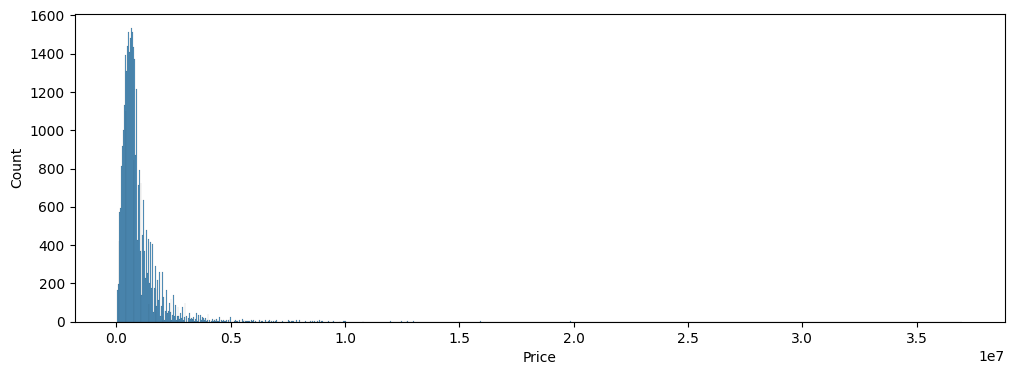

In [7]:
plt.figure(figsize=(12,4))
sns.histplot(df["Price"])

plt.show()

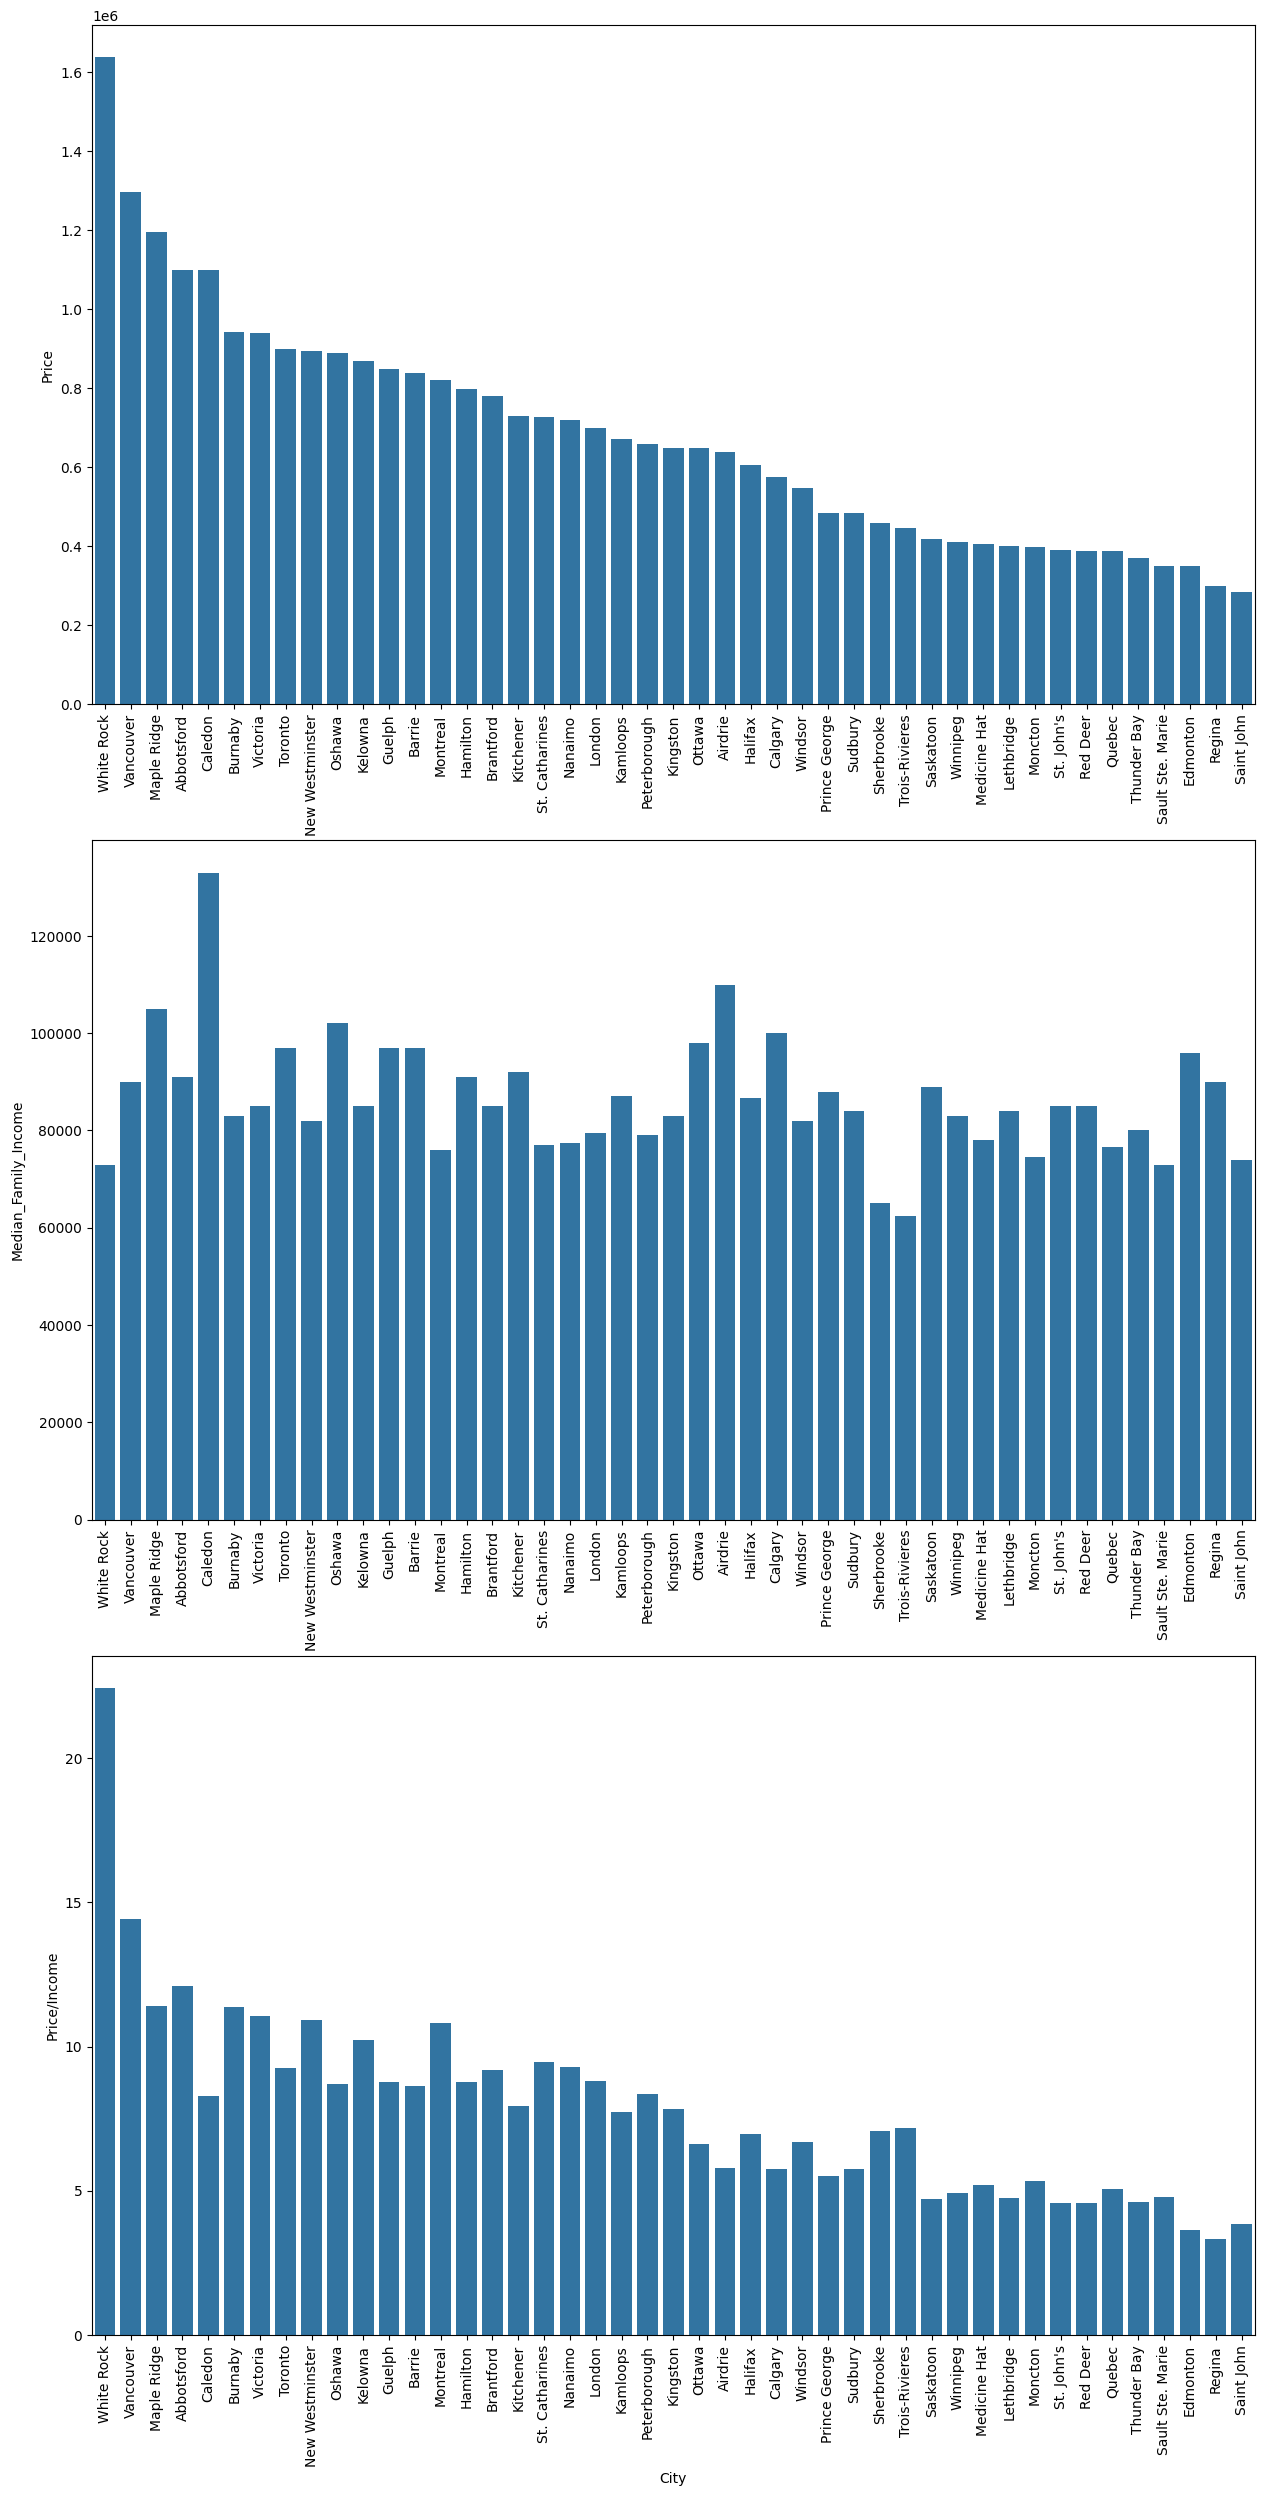

In [8]:
tmp_df = df.groupby("City").agg({"Price":"median","Median_Family_Income":"mean"}).sort_values("Price",ascending=False)
plt.figure(figsize=(15,30))

plt.subplot(311)
plt.xticks(rotation=90)
sns.barplot(x=tmp_df.index, y=tmp_df["Price"])

plt.subplot(312)
plt.xticks(rotation=90)
sns.barplot(x=tmp_df.index, y=tmp_df["Median_Family_Income"])

plt.subplot(313)
plt.xticks(rotation=90)
sns.barplot(x=tmp_df.index, y=tmp_df["Price"]/tmp_df["Median_Family_Income"])
plt.ylabel("Price/Income")

plt.show()

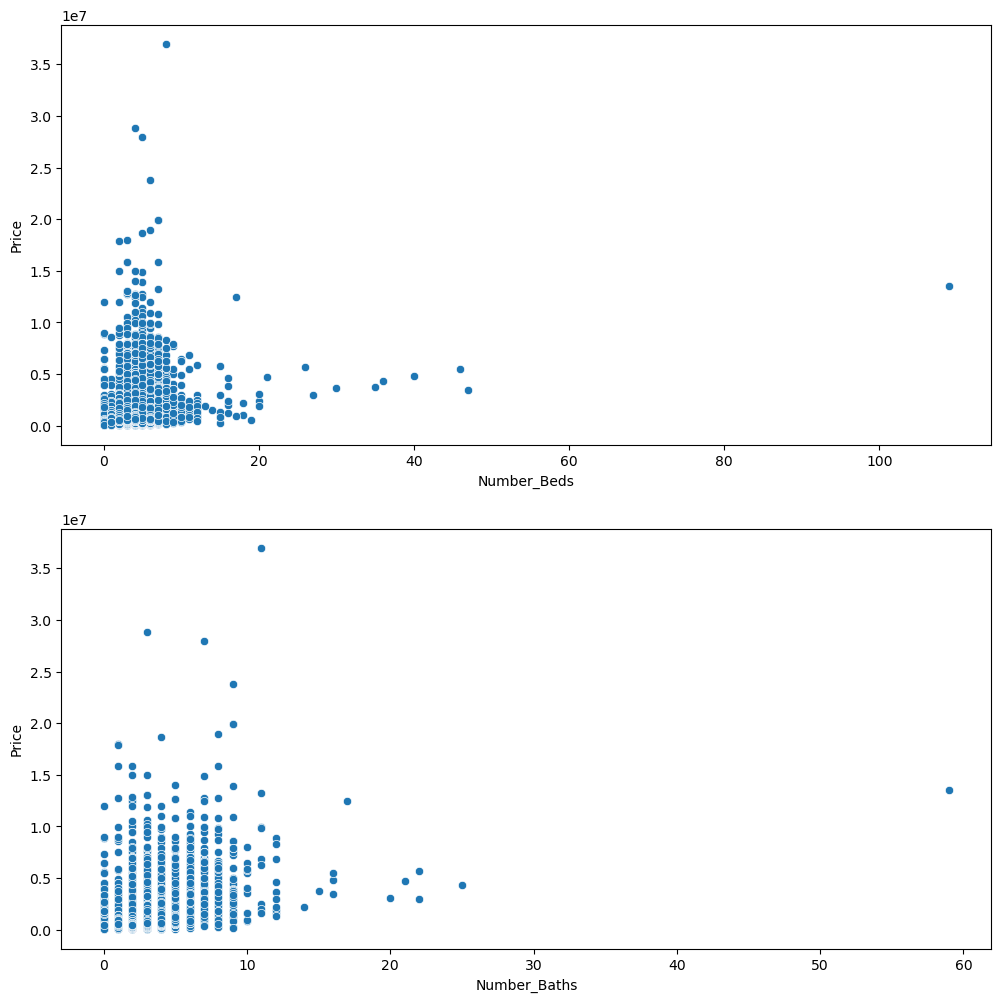

In [ ]:
plt.figure(figsize=(12,12))

plt.subplot(211)
sns.scatterplot(x=df["Number_Beds"],y=df["Price"])

plt.subplot(212)
sns.scatterplot(x=df["Number_Baths"],y=df["Price"])
plt.show()

we add an indicator of weather the property is an apartment or not by the number of the bedroom, properties with 3 and more bedrooms are identified as apartments.

In [9]:
df['Is_House'] = (df['Number_Beds'] >= 3).astype(int)
df.head()

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income,Is_House
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0,1
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0,1
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0,0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0,1
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0,0


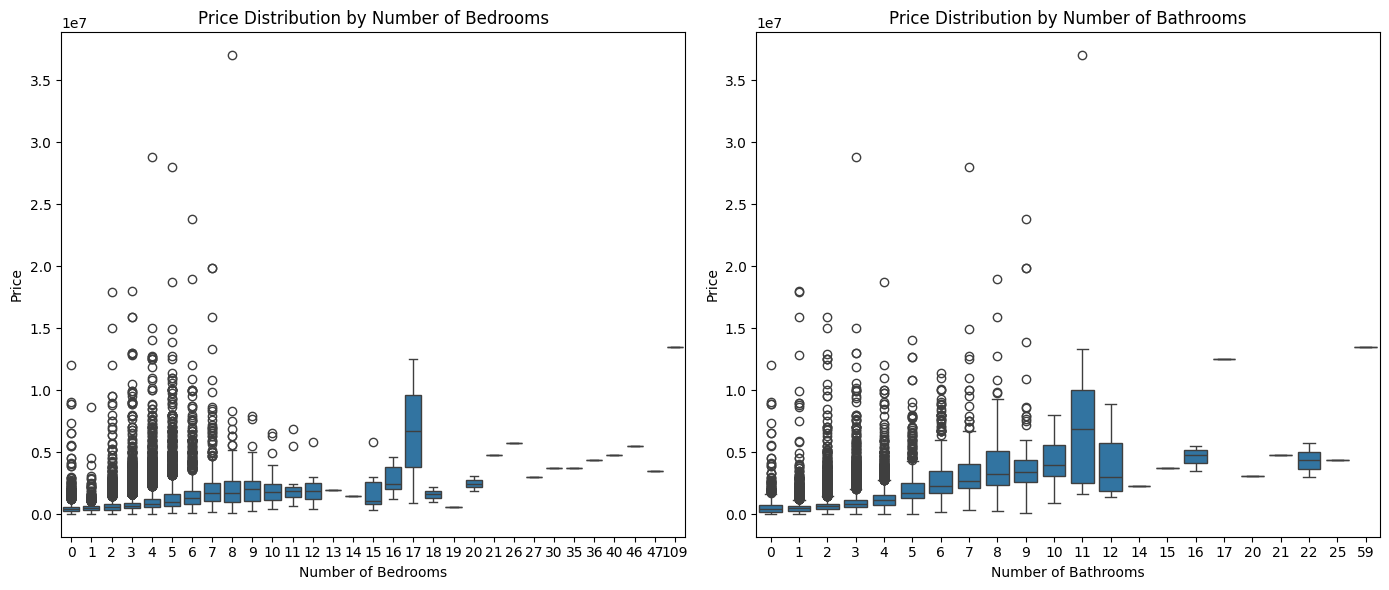

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Boxplot for Price vs. Number of Beds
sns.boxplot(x='Number_Beds', y='Price', data=df, ax=axes[0])
axes[0].set_title('Price Distribution by Number of Bedrooms')
axes[0].set_xlabel('Number of Bedrooms')
axes[0].set_ylabel('Price')

# Boxplot for Price vs. Number of Baths
sns.boxplot(x='Number_Baths', y='Price', data=df, ax=axes[1])
axes[1].set_title('Price Distribution by Number of Bathrooms')
axes[1].set_xlabel('Number of Bathrooms')
axes[1].set_ylabel('Price')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

Correlation Matrix \\
Prior to running a regression, we need to ensure that our independent variables are not strongly correlated with one and other. Any strong correlations amongst the independent variables may result in endogeneity and problems of multicollinearity

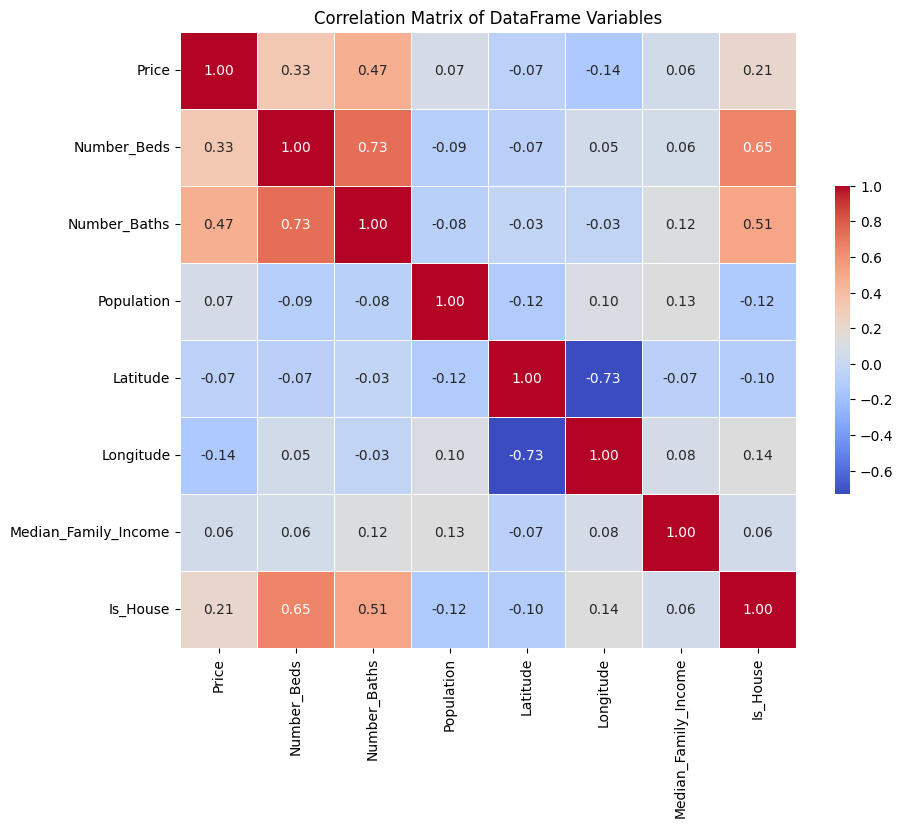

In [11]:
# Select only numeric columns for correlation matrix calculation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns only
corr_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of DataFrame Variables')
plt.show()

Summary Statistics \\
We can then proceed with describing the features of the dataset using summary statistics, such as; mean, median, mode and value counts for each of feature.

In [12]:
summary_stats = df.describe()
print(summary_stats)

              Price   Number_Beds  Number_Baths    Population      Latitude  \
count  3.576800e+04  35768.000000  35768.000000  3.576800e+04  35768.000000   
mean   9.432963e+05      3.283661      2.532403  6.360151e+05     47.446556   
std    1.020110e+06      1.730654      1.371910  1.120016e+06      3.333855   
min    2.150000e+04      0.000000      0.000000  6.338200e+04     42.283300   
25%    4.599000e+05      2.000000      2.000000  1.091670e+05     43.866700   
50%    6.990000e+05      3.000000      2.000000  2.424600e+05     49.025000   
75%    1.095000e+06      4.000000      3.000000  5.228880e+05     49.888100   
max    3.700000e+07    109.000000     59.000000  5.647656e+06     53.916900   

          Longitude  Median_Family_Income      Is_House  
count  35768.000000          35768.000000  35768.000000  
mean     -98.421636          89643.103416      0.686256  
std       22.280935          12132.353510      0.464020  
min     -123.936400          62400.000000      0.000000 


Histogram of response variable\\
A downward trend is clearly visible



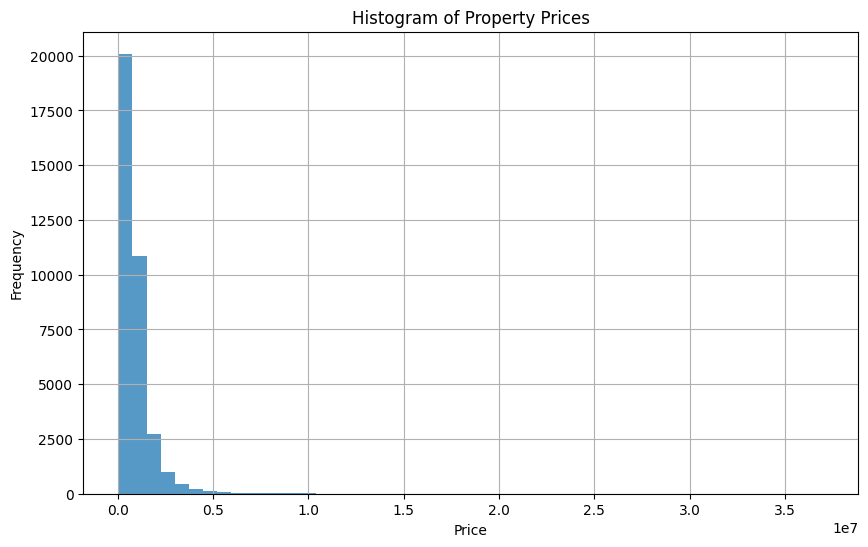

In [13]:
# Generate a histogram of the 'Price' column

plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=50, alpha=0.75)

plt.title('Histogram of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Methology


1.   Research Question
2.   Priors Set Up
3.   Model Construction
4.   Sampling
5.   Posterior Analysis





# 1. Research Question:


*   "How does the location (city) influence the housing prices, after controlling for house-specific features such as Number_Beds, Number_Baths, and Median_Family_Income, in the top 45 cities?"



# 2.  Priors Set Up


In [15]:
import pymc as pm
import pandas as pd


city_indices = pd.Categorical(df['City']).codes
num_cities = len(df['City'].unique())

with pm.Model() as hierarchical_model:
    # Hyperpriors for the global model parameters
    mu_alpha = pm.Normal('mu_alpha', mu=0, sigma=10)
    sigma_alpha = pm.HalfNormal('sigma_alpha', sigma=10)

    # Assuming no prior knowledge about the impact of number of beds and baths
    mu_beta_beds = pm.Normal('mu_beta_beds', mu=0, sigma=10)
    sigma_beta_beds = pm.HalfNormal('sigma_beta_beds', sigma=10)

    mu_beta_baths = pm.Normal('mu_beta_baths', mu=0, sigma=10)
    sigma_beta_baths = pm.HalfNormal('sigma_beta_baths', sigma=10)

    # Assuming some knowledge about the positive relation between income and housing prices
    mu_beta_income = pm.Normal('mu_beta_income', mu=0, sigma=1)
    sigma_beta_income = pm.HalfNormal('sigma_beta_income', sigma=1)

    # Random intercepts and slopes for each city
    alpha = pm.Normal('alpha', mu=mu_alpha, sigma=sigma_alpha, shape=num_cities)
    beta_beds = pm.Normal('beta_beds', mu=mu_beta_beds, sigma=sigma_beta_beds, shape=num_cities)
    beta_baths = pm.Normal('beta_baths', mu=mu_beta_baths, sigma=sigma_beta_baths, shape=num_cities)
    beta_income = pm.Normal('beta_income', mu=mu_beta_income, sigma=sigma_beta_income, shape=num_cities)

    # Model error
    sigma_y = pm.HalfNormal('sigma_y', sigma=1)

    # Expected value of outcome
    price_est = (alpha[city_indices] +
                 beta_beds[city_indices] * df['Number_Beds'] +
                 beta_baths[city_indices] * df['Number_Baths'] +
                 beta_income[city_indices] * df['Median_Family_Income'])

    # Likelihood (sampling distribution) of observations
    price_obs = pm.Normal('price_obs', mu=price_est, sigma=sigma_y, observed=df['Price'])

# Model sampling
with hierarchical_model:
    trace = pm.sample(1000, tune=1000, target_accept=0.9)

# 3. Construct a Hierarchical Model



  Using cached aesara-2.9.3-py3-none-any.whl (1.4 MB)


ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
ERROR:pymc.stats.convergence:There were 1313 divergences after tuning. Increase `target_accept` or reparameterize.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_alpha,0.059,0.167,-0.127,0.249,0.083,0.063,5.0,17.0,2.75
mu_beta_beds,-0.237,0.522,-0.936,0.491,0.259,0.198,4.0,11.0,3.64
mu_beta_baths,0.336,0.385,-0.148,0.907,0.191,0.146,4.0,10.0,3.75
mu_beta_income,0.294,0.434,-0.228,0.865,0.215,0.165,4.0,13.0,3.38
alpha[0],-0.174,0.643,-0.873,0.625,0.319,0.244,5.0,14.0,3.27
...,...,...,...,...,...,...,...,...,...
sigma_alpha,2.408,1.866,0.526,4.471,0.923,0.706,5.0,12.0,2.91
sigma_beta_beds,653.087,697.290,17.036,1704.964,345.839,264.614,4.0,12.0,4.07
sigma_beta_baths,1121.015,1189.406,7.821,2829.314,589.924,451.373,5.0,22.0,3.08
sigma_beta_income,7.202,0.342,6.695,7.653,0.137,0.102,7.0,51.0,1.57


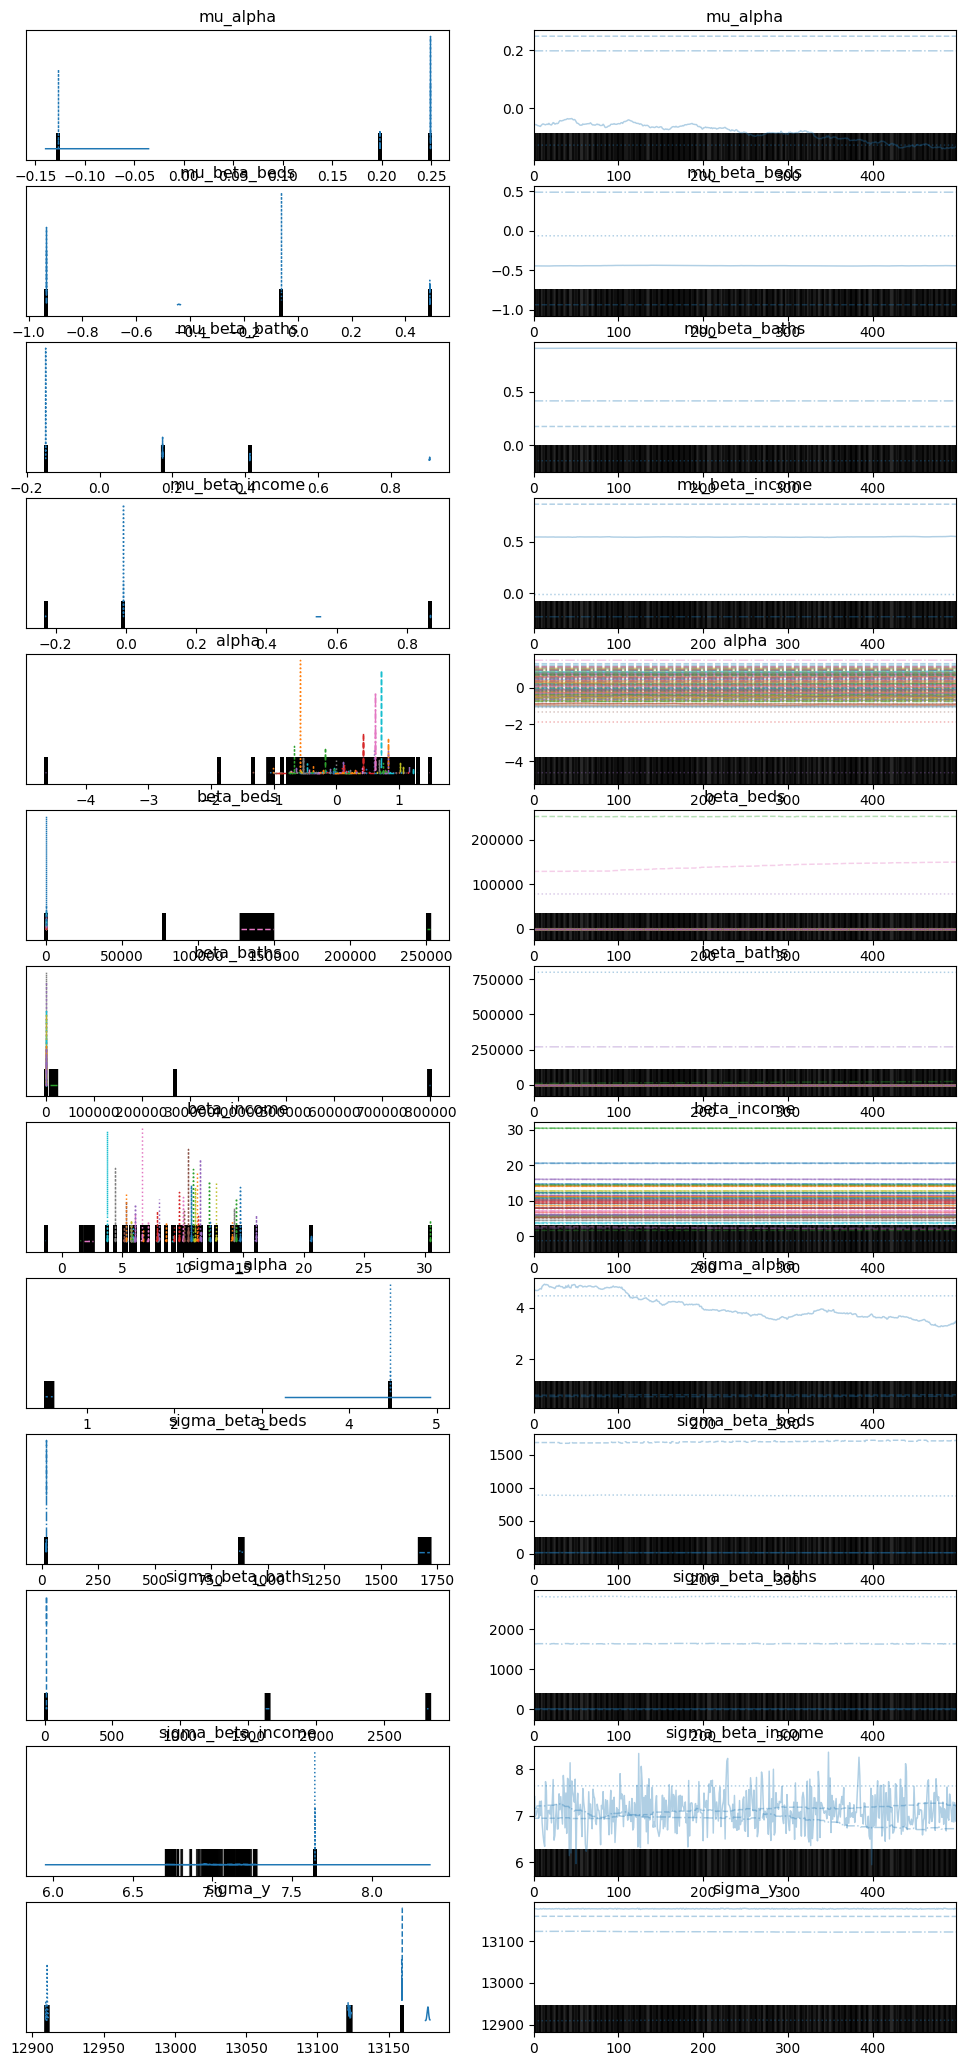

In [18]:
import pymc as pm
import pandas as pd
import numpy as np

!pip install aesara
import aesara.tensor as tt

# Create an index for each city
city_indices = pd.Categorical(df['City']).codes
num_cities = len(np.unique(city_indices))

with pm.Model() as hierarchical_model:
    # Hyperpriors for the global model parameters
    mu_alpha = pm.Normal('mu_alpha', mu=0, sigma=10)
    sigma_alpha = pm.HalfNormal('sigma_alpha', sigma=10)

    mu_beta_beds = pm.Normal('mu_beta_beds', mu=0, sigma=10)
    sigma_beta_beds = pm.HalfNormal('sigma_beta_beds', sigma=10)

    mu_beta_baths = pm.Normal('mu_beta_baths', mu=0, sigma=10)
    sigma_beta_baths = pm.HalfNormal('sigma_beta_baths', sigma=10)

    mu_beta_income = pm.Normal('mu_beta_income', mu=0, sigma=1)
    sigma_beta_income = pm.HalfNormal('sigma_beta_income', sigma=1)

    # City-specific random intercepts and slopes
    alpha = pm.Normal('alpha', mu=mu_alpha, sigma=sigma_alpha, shape=num_cities)
    beta_beds = pm.Normal('beta_beds', mu=mu_beta_beds, sigma=sigma_beta_beds, shape=num_cities)
    beta_baths = pm.Normal('beta_baths', mu=mu_beta_baths, sigma=sigma_beta_baths, shape=num_cities)
    beta_income = pm.Normal('beta_income', mu=mu_beta_income, sigma=sigma_beta_income, shape=num_cities)

    # Standard deviation of model error
    sigma_y = pm.HalfNormal('sigma_y', sigma=1)

    # Expected value (mean) of outcome
    price_est = (alpha[city_indices] +
                 beta_beds[city_indices] * df['Number_Beds'] +
                 beta_baths[city_indices] * df['Number_Baths'] +
                 beta_income[city_indices] * df['Median_Family_Income'])

    # Data likelihood
    price_obs = pm.Normal('price_obs', mu=price_est, sigma=sigma_y, observed=df['Price'])

    # Posterior sampling
    trace = pm.sample(500, tune=500, chains=4, cores=1, target_accept=0.9)

# After the model has run, can do various posterior checks like
pm.plot_trace(trace)
pm.summary(trace)

# 4. Sampling

In [22]:
!pip install arviz
import arviz as az

with hierarchical_model:
    # Sampling from the posterior distribution
    trace = pm.sample(500, tune=500, chains=4, cores=1, target_accept=0.9)

    # Save the trace for later analysis
    az.to_netcdf(trace, 'my_hierarchical_model_trace.nc')

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


# 5. Posterior Analysis

                        mean        sd     hdi_3%    hdi_97%  mcse_mean  \
mu_alpha              -0.148     0.353     -0.598      0.274      0.175   
mu_beta_beds           0.030     0.511     -0.701      0.555      0.253   
mu_beta_baths         -0.545     0.215     -0.887     -0.326      0.106   
mu_beta_income         0.408     0.668     -0.734      0.979      0.331   
alpha[0]              -0.173     0.781     -0.940      1.132      0.387   
...                      ...       ...        ...        ...        ...   
sigma_alpha            9.236     6.259      0.541     18.212      3.104   
sigma_beta_beds      344.212   585.269      3.817   1475.400    289.570   
sigma_beta_baths     660.457  1099.237     23.558   2567.482    545.202   
sigma_beta_income      2.402     2.553      0.390      6.879      1.265   
sigma_y            13142.565    80.573  12991.439  13202.209     39.926   

                   mcse_sd  ess_bulk  ess_tail  r_hat  
mu_alpha             0.134       5.0      1

<xarray.Dataset>
Dimensions:            (alpha_dim_0: 45, beta_beds_dim_0: 45,
                        beta_baths_dim_0: 45, beta_income_dim_0: 45)
Coordinates:
  * alpha_dim_0        (alpha_dim_0) int64 0 1 2 3 4 5 6 ... 39 40 41 42 43 44
  * beta_beds_dim_0    (beta_beds_dim_0) int64 0 1 2 3 4 5 ... 39 40 41 42 43 44
  * beta_baths_dim_0   (beta_baths_dim_0) int64 0 1 2 3 4 5 ... 40 41 42 43 44
  * beta_income_dim_0  (beta_income_dim_0) int64 0 1 2 3 4 5 ... 40 41 42 43 44
Data variables: (12/13)
    mu_alpha           float64 3.158
    mu_beta_beds       float64 4.097
    mu_beta_baths      float64 3.869
    mu_beta_income     float64 4.029
    alpha              (alpha_dim_0) float64 3.631 3.916 3.763 ... 3.232 4.094
    beta_beds          (beta_beds_dim_0) float64 3.128 3.52 ... 3.903 3.228
    ...                 ...
    beta_income        (beta_income_dim_0) float64 1.061 1.119 ... 1.076 1.073
    sigma_alpha        float64 3.083
    sigma_beta_beds    float64 3.388
    sigma_beta_baths   float64 2.86
    sigma_beta_income  float64 3.948
    sigma_y            float64 3.375

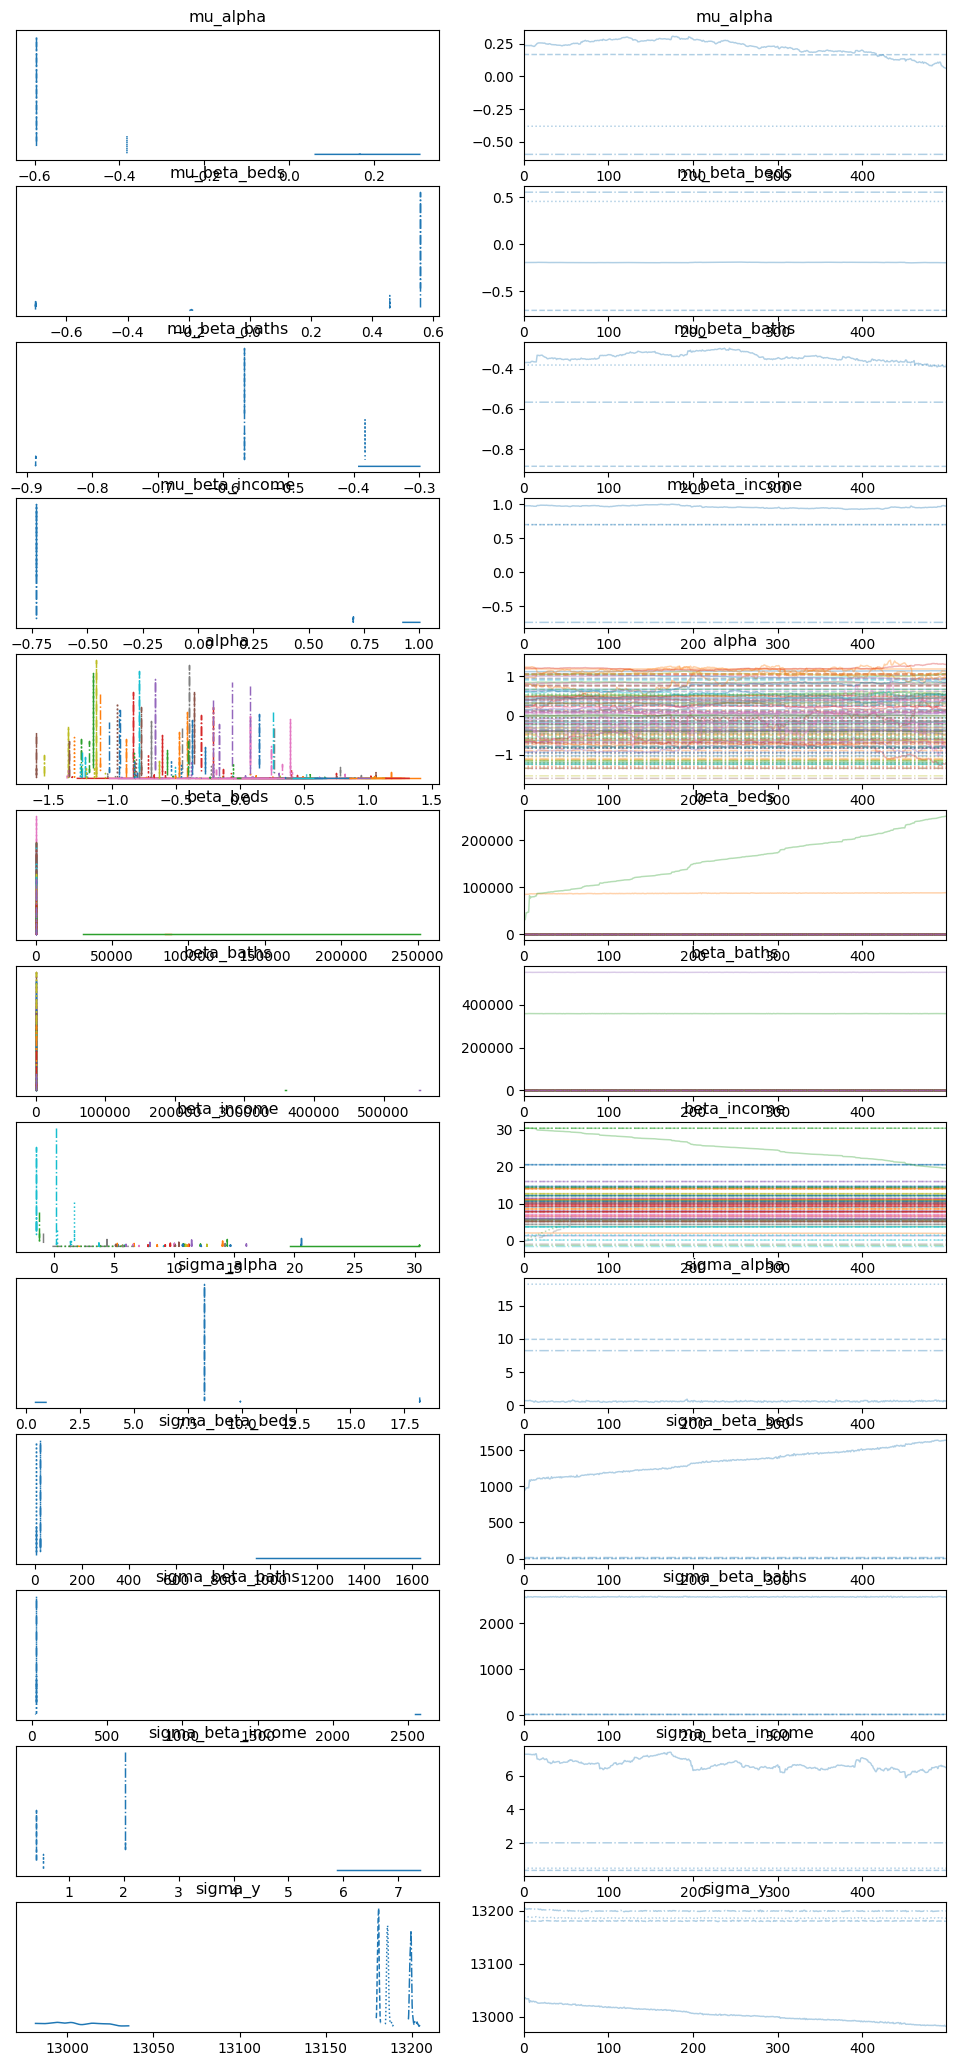

In [24]:
#Trace Plots
az.plot_trace(trace)

#Summary Statistics
summary = pm.summary(trace)
print(summary)

#Posterior Predictive Checks
posterior_preds = pm.sample_posterior_predictive(trace, model=hierarchical_model)

#Convergence Diagnostics
pm.rhat(trace)